In [1]:
# coding:utf-8
# 1. 读取原训练数据转换为pd格式
# 2. 对数据进行处理
# 3. 可视化一波，清洗数据
# 4. 使用不同分类方法，选择最佳参数
# 5. 使用stacking训练模型
# 6. 读取待分割图像，预测，分割

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
def get_train_data(train_data_path, _base=1):
    # 获取数据转换为矩阵
    train_data, labels = [], []
    with open(train_data_path) as f:
        for line in f.readlines():
            line_data = line.strip().split("\t")
            _data = []
            for d in line_data[_base:-1]:
                _data.append(float(d))
            train_data.append(_data)
            labels.append(int(line_data[-1]))
    return np.mat(train_data), np.mat(labels).T


def pre_process(data, alpha=0.99, is_total=False):
    """离差标准化(0, 1)"""
    m, n = np.shape(data)
    ret = np.zeros((m, n))
    for i in range(m):
        total = np.sum(data[i, :])
        max_value = np.max(data[i, :])
        for j in range(n):
            if is_total:
                ret[i, j] = data[i, j] / total * alpha
            else:
                ret[i, j] = [data[i, j], 1][data[i, j] == 0] / max_value * alpha
    return ret


In [3]:
# 训练数据路径
train_data_path = r"C:\Study\github\Lookoops\tool\bone_segementation_use_stacking\data.txt"
train_raw, labels = get_train_data(train_data_path, 2)
train_raw = pre_process(train_raw)
train_dataset = pd.DataFrame(train_raw)
labels = pd.DataFrame(labels)
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000600,0.003200,0.001055,0.001727,0.003509,0.011182,0.016764,0.021691,0.021800,0.030291,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
1,0.000203,0.419711,0.000990,0.004577,0.011115,0.013969,0.018935,0.037278,0.057617,0.077153,...,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
2,0.000827,0.000016,0.000016,0.000016,0.000203,0.001545,0.005897,0.016553,0.034510,0.064886,...,0.005632,0.006241,0.005507,0.005975,0.005258,0.004290,0.004290,0.003245,0.002091,0.001498
3,0.000390,0.019799,0.000008,0.000008,0.000008,0.000008,0.000008,0.000284,0.053961,0.456731,...,0.001056,0.000975,0.001081,0.001535,0.004387,0.002177,0.000008,0.000008,0.000008,0.000008
4,0.001272,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039


In [4]:
print(train_dataset.shape, labels.shape)
_train = np.hstack((train_dataset,labels))
train = pd.DataFrame(_train)
train.head()

(406, 256) (406, 1)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,0.000600,0.003200,0.001055,0.001727,0.003509,0.011182,0.016764,0.021691,0.021800,0.030291,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,25.0
1,0.000203,0.419711,0.000990,0.004577,0.011115,0.013969,0.018935,0.037278,0.057617,0.077153,...,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,21.0
2,0.000827,0.000016,0.000016,0.000016,0.000203,0.001545,0.005897,0.016553,0.034510,0.064886,...,0.006241,0.005507,0.005975,0.005258,0.004290,0.004290,0.003245,0.002091,0.001498,27.0
3,0.000390,0.019799,0.000008,0.000008,0.000008,0.000008,0.000008,0.000284,0.053961,0.456731,...,0.000975,0.001081,0.001535,0.004387,0.002177,0.000008,0.000008,0.000008,0.000008,14.0
4,0.001272,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,95.0


In [5]:
labels.head()

,0
0,25
1,21
2,27
3,14
4,95


In [6]:
train[255].describe() # 标签

count    4.060000e+02
mean     8.419853e-04
std      3.378738e-03
min      3.468238e-07
25%      6.390833e-06
50%      1.470254e-04
75%      7.320444e-04
max      3.818617e-02
Name: 255, dtype: float64

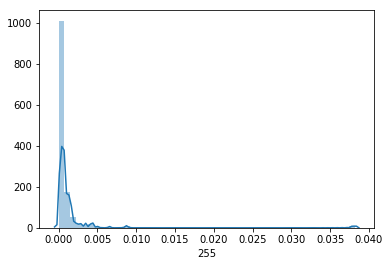

In [7]:
sns.distplot(train[255]) # 标签可视化

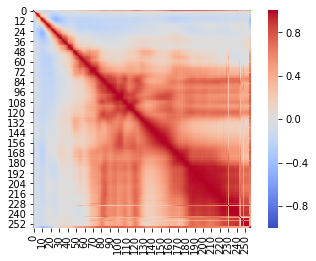

In [8]:
corrmatrix = train.corr()
sns.heatmap(corrmatrix,square=True,vmax=1,vmin=-1,center=0.0,cmap='coolwarm')

In [9]:
# 查看数据是否存在
null_value = train.isnull().sum()
sort_null = null_value[null_value > 0].sort_values(ascending=False)
print(sort_null)

Series([], dtype: int64)


In [10]:
k = 50 # 查看与阈值相关的数据
corrmatrix = train.corr()
corrmatrix.nlargest(k, 255)[255].index

Int64Index([255, 254, 253, 251, 252, 250, 249, 247, 246, 239, 240, 242, 241,
            238, 237, 236, 233, 243, 234, 235, 232, 229, 230, 227, 225, 226,
            224, 222, 228, 223, 221, 220, 188, 219, 189, 191, 201, 218, 190,
            200, 187, 202, 216, 217, 215, 199, 205, 198, 203, 192],
           dtype='int64')

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error

In [12]:
# 获得均差
def cv_rmse(model, X, y):
    # cross_val_score函数用法：https://www.cnblogs.com/lzhc/p/9175707.html
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [13]:
models = [
    KNeighborsClassifier(),# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    SVC(), # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    DecisionTreeClassifier(), # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    RandomForestClassifier(), # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    ExtraTreesClassifier(), # 
    AdaBoostClassifier(), # 
    GradientBoostingClassifier (), # 
    VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('gnb', GaussianNB())],
                     voting='soft', flatten_transform=True), # 
    BaggingClassifier(), # 
    GaussianNB(), # 
    LogisticRegression(), # 
    XGBClassifier(), # 
]

In [14]:
# 查看各个模型对数据的分类能力， 差的不要
names = ["KNeighbors", "SVC", "DecisionTree", "RandomForest", "ExtraTrees", "AdaBoost", "GradientBoosting", "Voting","Bagging","GaussianNB","LogisticRegression","XGB"]
for name, model in zip(names, models):
    score = cv_rmse(model, train_dataset, labels)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

KNeighbors: 10.771922, 10.2362


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC: 12.710739, 8.7934
DecisionTree: 11.076986, 11.3434


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

RandomForest: 6.763309, 3.7945


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

ExtraTrees: 7.047044, 5.6550


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

AdaBoost: 12.879246, 8.6597


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GradientBoosting: 9.122043, 7.1147


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

Voting: 9.170405, 6.7679


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Bagging: 8.140179, 5.2423
GaussianNB: 9.651912, 6.9889


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

LogisticRegression: 5.884041, 1.8734


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

XGB: 8.750351, 7.3658


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
# 网格搜索
class grid():
    def __init__(self, model):
        self.model = model
        
    def grid_train(self, X, y, train_para):
        grid_search = GridSearchCV(self.model, train_para, cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X, y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_)) # 打印最好的结果
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [ ]:
# 调参
grid(SVC()).grid_train(train_dataset, labels, {'kernel': ['rbf', 'poly', 'sigmoid'], 'gamma':[0.05, 0.1, 0.5, 1, 5, 10, 15, 20], 'degree':[2, 3, 4, 5]})

In [ ]:
grid(DecisionTreeClassifier()).grid_train(train_dataset, labels, {})

In [ ]:
# stacking集成学习
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, model, fusion_model):
        self.model = model
        self.fusion_model = fusion_model
        self.kf = KFold(n_splits=14, random_state=50, shuffle=True)
        
    def fit(self, X, y):
        self.model_saved = [list() for i in self.model] 
        train_pred = np.zeros((X.shape[0], len(self.model))) # 存储每个数据被预测的结果， 其结果使用融合模型进行训练
        
        for i,mod in enumerate(self.model):
            for train_index, value_index in self.kf.split(X, y):
                tmp_model = clone(mod)
                tmp_model.fit(X[train_index], y[train_index])
                self.model_saved[i].append(tmp_model)
                train_pred[value_index, i] = tmp_model.predict(X[value_index])
        self.fusion_model.fit(train_pred, y) # 将训练数据预测结果作为融合模型的输入训练数据
        
        return self
    
    def predict(self, X):
        test_mean = np.column_stack([np.column_stack(mod.predict(X) for mod in tmp_model).mean(axis=1) for tmp_model in self.model_saved]) # 对每个test数据进行预测并取平局值
        return self.fusion_model.predict(test_mean)


In [ ]:
# 根据上面调参得到的参数填入下面模型中作为最优模型
train_models = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier (),
    VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('gnb', GaussianNB())],
                     voting='soft', flatten_transform=True),
    BaggingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier(),
]

In [ ]:
stack_model = stacking(train_models, LogisticRegression()) # 选择一个简单并且rms较低的模型作为融合模型

In [ ]:
stack_model.fit(train_dataset, labels) # 训练模型

In [ ]:
import pickle 
fp = open("pickle_prediction_model.pkl", "wb")
pickle.dump(stack_model, fp)
fp.close()